In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3300,8500,521)

In [4]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

49


In [5]:
sn_names[0]

'SN2003du.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
file = open("factors.txt")
lines = file.readlines()
file.close()

In [9]:
max_names = []
max_values = []

In [10]:
ll = []

In [11]:
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    max_names.append(co[0])
    max_values.append(co[1])

In [12]:
new_names = []

In [13]:
sort = []

In [14]:
for k in range(0,len(sn_names)):
    
    if sn_names[k][:-4] in max_names:
        
        idx = max_names.index(sn_names[k][:-4])
        #print(float(max_values[idx]))
    
        file = open(sn_names[k])
        lines = file.readlines()
        file.close()

        xtemp = []

        for line in lines:

            if line.startswith('#'): continue
            co=line.rstrip().replace('INDEF','Nan').split()

            xtemp.append(co[0])

        xtemp = np.array(xtemp, dtype=float)
        
        xtemp = xtemp*float(max_values[idx])
        

        #xtemp = xtemp/max(xtemp)
        new_names.append(sn_names[k])

        ll.append(max(xtemp))
        z = np.reshape(xtemp, (521, 61))

        zz = []
        xx = []
        yy = []

        for i in range(0,len(y)):

            for j in range(0,len(x)):

                zz.append(z[i][j])
                xx.append(x[j])
                yy.append(y[i])


        sort.append(sn_names[k][:-4])

        X.append(np.array(zz))

In [15]:
len(X)

44

<IPython.core.display.Javascript object>


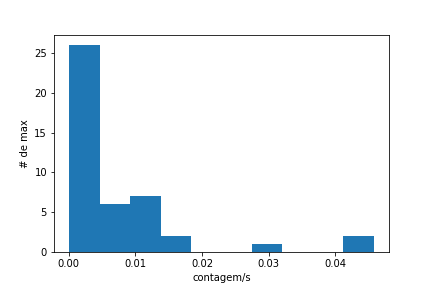

In [71]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(ll, bins=10)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [17]:
new_names[1]

'SN2001V.dat'

In [18]:
len(sort)

44

In [19]:
ll

[0.010847904412800001,
 0.0040445598072,
 0.0012506144096800001,
 0.0008994029121,
 0.00044926184099999995,
 0.0007622016215,
 0.006261419783000001,
 0.0059754073175999995,
 0.0012337873175599999,
 0.0009200861231099999,
 0.04571693316,
 0.0006693964335,
 0.0026961212498000002,
 0.00206050131173,
 0.0086577529647,
 0.00303508866084,
 0.013312012689199999,
 0.029101426479999998,
 0.00048653380125000004,
 0.0099799196661,
 0.0104828232405,
 0.00041249921775000003,
 0.012906883026699999,
 0.0062635546943000005,
 0.00552166314,
 0.00010189803702,
 0.01701570528,
 0.0072878894478,
 0.00092463300864,
 0.003957217797,
 0.00284824465536,
 0.00139179796362,
 0.002085382174,
 0.000242713777306,
 0.00102494238336,
 0.044132148723999995,
 0.0120715127872,
 0.00110499812391,
 0.0002503750074,
 0.0036500774736,
 0.00164776280037,
 0.010027517070600001,
 0.0006565933274399999,
 0.017810851844]

In [20]:
x[10]

0.0

In [21]:
len(X)

44

In [22]:
N = 3

In [23]:
from numpy.random import RandomState

In [24]:
rng = RandomState(0)

pca = PCA(n_components=3, whiten=True, svd_solver = 'randomized')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [25]:
pca.noise_variance_

0.00010490743710900646

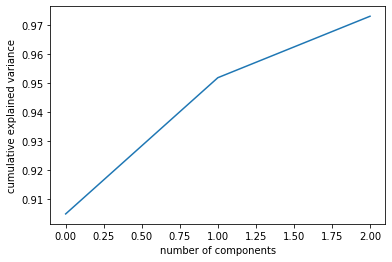

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
range(N)

range(0, 3)

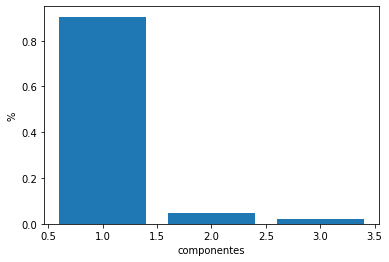

In [28]:
%matplotlib inline
plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.xlabel("componentes")
plt.ylabel("%")
plt.show()

## Soma das variancias relativas

### primeira e segunda

In [29]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.9519095388210121

In [30]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.9731043495831383

### primeira, segunda e terceira

In [31]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [32]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [33]:
pca.components_[0]

array([0.00158766, 0.00061613, 0.00011912, ..., 0.00025219, 0.00023613,
       0.00022231])

In [34]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [35]:

        
        if max(xtemp) < 0.02:x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3300,8500,521)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

<IPython.core.display.Javascript object>


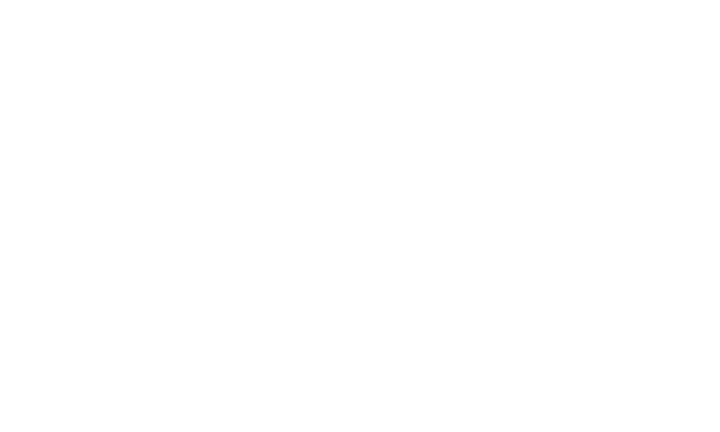

<IPython.core.display.Javascript object>


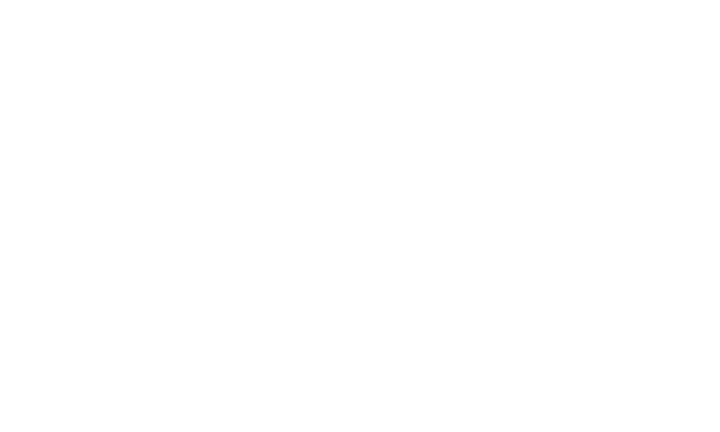

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

# Componentes

In [72]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

<IPython.core.display.Javascript object>


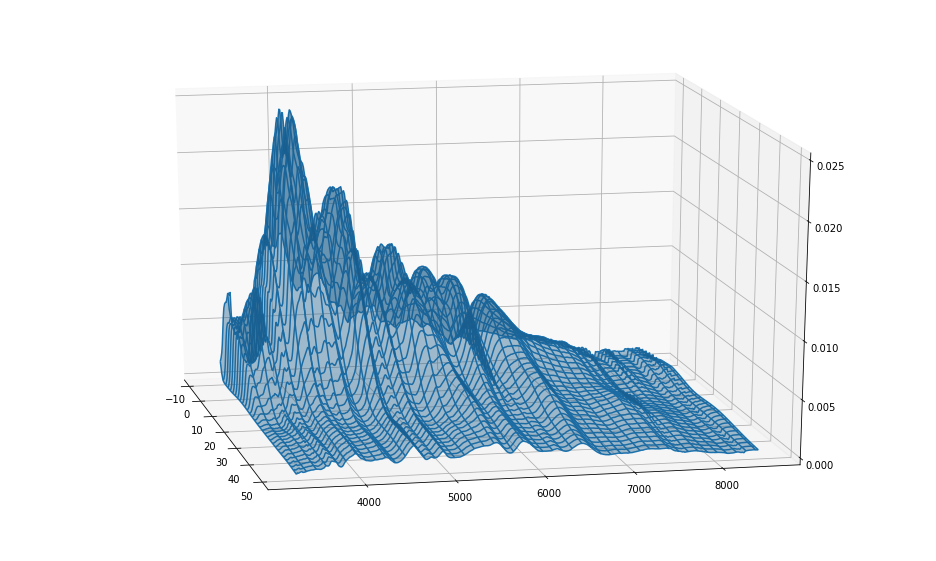

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2), value=0), Output()), _dom_classes=…

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

# Superficies com N componentes

In [79]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

<IPython.core.display.Javascript object>


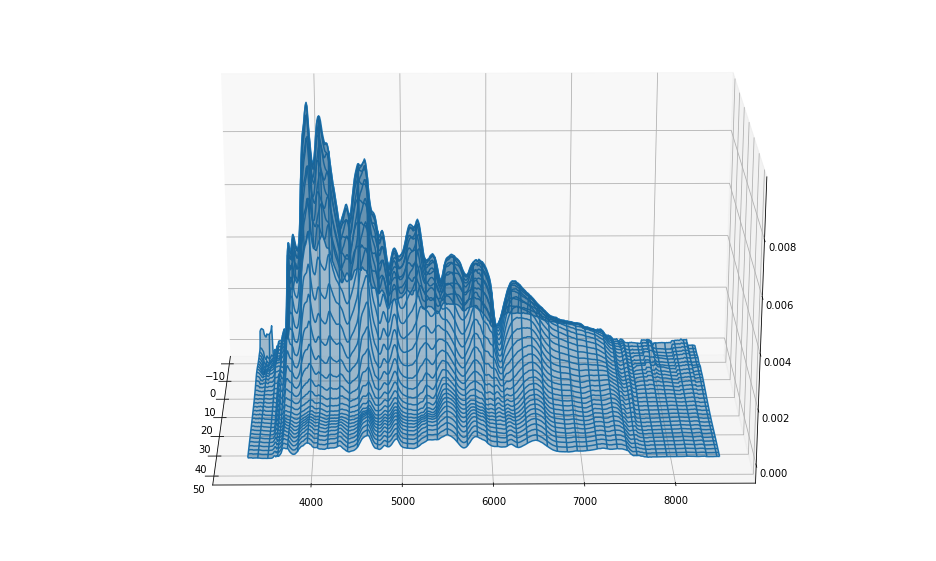

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [84]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


# Superficies originais

In [82]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

<IPython.core.display.Javascript object>


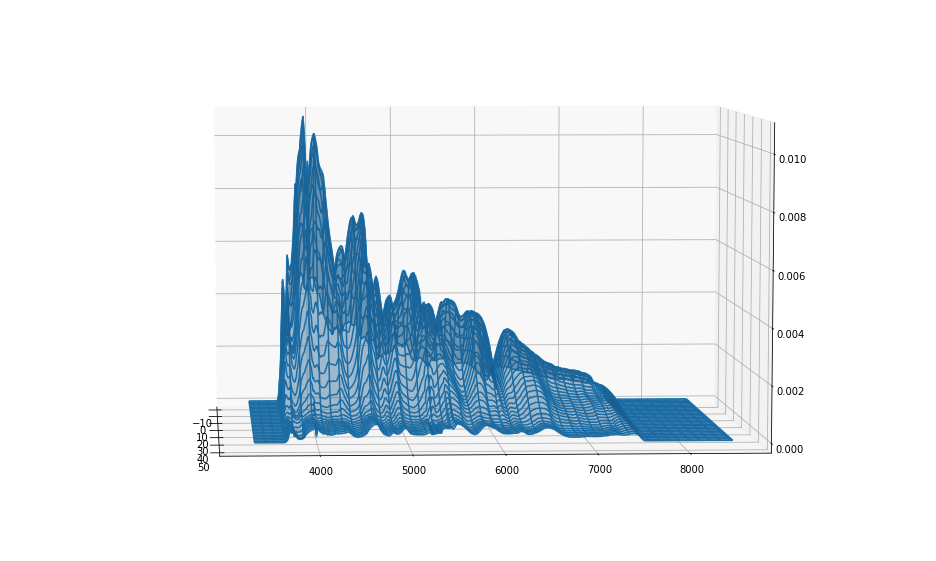

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [85]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

In [43]:
new_names[0]

'SN2003du.dat'

In [44]:
pca.components_[0]

array([0.00158766, 0.00061613, 0.00011912, ..., 0.00025219, 0.00023613,
       0.00022231])

In [45]:
len(pca.components_[0])

31781

In [46]:
Z = interp.griddata((xx,yy),pca.components_[0],(B1,B2),method='cubic')

In [47]:
len(Z)

521

In [48]:
teste = Z.transpose()

In [49]:
len(teste)

61

In [50]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [51]:
save_path = '/home/joao/Documentos'

In [52]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [53]:
Z = interp.griddata((xx,yy),pca.components_[1],(B1,B2),method='cubic')

In [54]:
teste = Z.transpose()

In [55]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [56]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [57]:
Z = interp.griddata((xx,yy),pca.components_[2],(B1,B2),method='cubic')

In [58]:
teste = Z.transpose()

In [59]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [60]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [61]:
arrays = [np.array(u) for u in X]

In [62]:
from scipy.stats import skew

In [63]:
med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

<IPython.core.display.Javascript object>


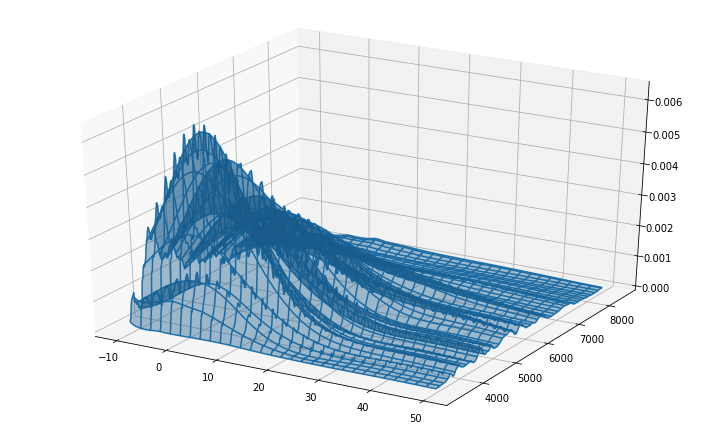

In [64]:
%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

In [65]:
Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

In [66]:
teste = Z.transpose()

In [67]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [68]:
'''
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\ntable = []\nfor l in range(0,len(exp_x)):\n    table.append((exp_x[l],exp_y[l],exp_z[l]))\n\n\ncompleteName = os.path.join(save_path, "M2.dat")\n\nf = open(completeName, \'w\')\nf.write(tabulate(table, tablefmt="plain"))\nf.close()\n'